In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
PATH_DATA = '../data'

In [3]:
state = 'RJ'
column = 'casos'
df_ep = pd.read_parquet(f'{PATH_DATA}/cases/{state}_dengue.parquet',
                           columns = ['data_iniSE', column, 'municipio_geocodigo', 'p_rt1', 'Rt', 'p_inc100k'])

df_ep.head()

,casos,municipio_geocodigo,p_rt1,Rt,p_inc100k
data_iniSE,,,,,
2013-09-01,0,3301405,0.0,0.0,0.0
2014-08-10,0,3301108,0.0,0.0,0.0
2014-02-09,0,3301405,0.5,0.0,0.0
2014-03-02,0,3301405,0.5,0.0,0.0
2014-03-16,0,3301405,0.5,0.0,0.0


In [4]:
def get_geocodes_and_state(macro): 
    '''
    This function is used to get the geocodes and state that refer to a specific health macro region code
    
    :param macro:int. A four-digit number
        
    '''
    
    dfs = pd.read_csv('../macro_saude.csv')
    
    geocodes = dfs.loc[dfs.code_macro == macro].geocode.unique()
    state = dfs.loc[dfs.code_macro == macro].state.values[0]

    return geocodes, state

def get_cases(macro, column): 
    
    geocodes, state = get_geocodes_and_state(macro)
    
    df_ep = pd.read_parquet(f'{PATH_DATA}/cases/{state}_dengue.parquet',
                           columns = ['data_iniSE', column, 'municipio_geocodigo', 'p_rt1', 'Rt', 'p_inc100k'])
    
    # select only the geocodes include in the health macroregion
    df_ep = df_ep.loc[df_ep.municipio_geocodigo.isin(geocodes)]
    
    df_ep = df_ep.sort_index()
    
    
    return df_ep[[column]].resample('W-SUN').sum()
    
    
    
    

In [5]:
get_cases(2111, 'casos_est')

,casos_est
data_iniSE,
2010-01-03,13.0
2010-01-10,19.0
2010-01-17,26.0
2010-01-24,26.0
2010-01-31,30.0
...,...
2024-01-07,13.0
2024-01-14,11.0
2024-01-21,8.0


In [6]:
get_cases(3103, 'casos').tail(6)

,casos
data_iniSE,
2023-12-31,10053
2024-01-07,13457
2024-01-14,20825
2024-01-21,26793
2024-01-28,20442
2024-02-04,4101


In [7]:
s1 = get_cases(3103, 'casos').tail()

s2 = get_cases(3103, 'casos_est').tail()

pd.concat([s1,s2],axis =1)

,casos,casos_est
data_iniSE,,
2024-01-07,13457,14933.0
2024-01-14,20825,24692.5
2024-01-21,26793,36856.0
2024-01-28,20442,47413.0
2024-02-04,4101,74526.0


In [8]:
from epiweeks import Week

Week.fromdate(pd.to_datetime('2024-01-28'))

Week(2024, 5, CDC)

In [9]:
get_cases(3103, 'casos_est').tail()

,casos_est
data_iniSE,
2024-01-07,14933.0
2024-01-14,24692.5
2024-01-21,36856.0
2024-01-28,47413.0
2024-02-04,74526.0


In [10]:
macro = 3103

df = pd.read_csv(f'../data/dengue_{macro}.csv.gz', index_col = 'Unnamed: 0')

df.tail()

,casos_est_3105400,p_rt1_3105400,Rt_3105400,p_inc100k_3105400,casos_est_3106200,p_rt1_3106200,Rt_3106200,p_inc100k_3106200,casos_est_3106705,p_rt1_3106705,...,diff_casos_est_3152006,diff_casos_est_3154606,diff_casos_est_3156700,diff_casos_est_3157807,diff_casos_est_3162922,diff_casos_est_3165537,diff_casos_est_3167202,diff_casos_est_3171204,diff_casos_est_3103,diff_casos_est_small
2024-01-07,362.0,1.000000e+00,4.381213,1181.34640,4062.5,1.0,3.070990,169.78883,642.0,1.0,...,9.0,172.5,76.0,214.0,29.0,-23.0,125.5,211.0,4350.0,663.0
2024-01-14,326.0,1.000000e+00,1.702740,1063.86450,7026.0,1.0,2.563173,293.64587,1583.0,1.0,...,3.0,540.0,248.0,427.0,53.0,-4.0,236.5,354.0,9759.5,1036.0
2024-01-21,172.0,1.064572e-07,0.610215,561.30273,10813.0,1.0,2.317198,451.92040,2634.0,1.0,...,-9.0,868.5,284.0,1025.0,27.0,17.5,-466.0,294.5,12163.5,1942.0
2024-01-28,123.0,3.219647e-15,0.444566,401.39673,12863.0,1.0,1.771434,537.59845,3992.0,1.0,...,14.5,824.5,428.0,1381.5,10.0,19.5,-3.0,-499.5,10557.0,1516.5
2024-02-04,357.5,1.000000e+00,1.647569,1166.66130,16744.5,1.0,1.631533,699.82260,6430.5,1.0,...,31.5,2349.0,670.5,2669.0,67.0,18.0,225.5,288.0,27113.0,4439.5


In [27]:
df_for = pd.read_csv(f'/Users/eduardoaraujo/Downloads/forecast_tables/forecast_{macro}.csv.gz', index_col = 'date')
df_for.head()

,Unnamed: 0,lower_2_5,lower_25,forecast,upper_75,upper_97_5,macroregion,prob_high,prob_low,HT,LT,HTinc,LTinc
date,,,,,,,,,,,,,
2024-02-04,0,5451.011874,6952.409334,7586.639471,8279.272800,9834.340728,3311,100.0,0.0,1075.888306,258.447653,7.881915,1.893377
2024-02-11,1,6135.231418,7728.687757,8237.136507,8802.548927,10138.743759,3311,100.0,0.0,1136.106074,288.241973,8.323068,2.111649
2024-02-18,2,6813.058022,8413.998238,8900.996429,9452.759074,10507.191441,3311,100.0,0.0,1641.076103,411.290341,12.022459,3.013097
2024-02-25,3,7682.912201,8887.990141,9631.755573,10111.708572,11254.916216,3311,100.0,0.0,2012.810053,448.063255,14.745767,3.282494
2024-03-03,4,7586.742704,9071.777677,9872.429010,10449.081902,11466.774578,3311,100.0,0.0,1967.036568,412.693315,14.410432,3.023375


In [28]:


def comp_preds(date, macro, column = 'casos_est'): 
    
    df = get_cases(macro, column)

    df_for = pd.read_csv(f'/Users/eduardoaraujo/Downloads/forecast_tables/forecast_{macro}.csv.gz', index_col = 'date')
    del df_for['Unnamed: 0']
    
    casos_est =  df.loc[date][f'{column}']

    for_lower = df_for.loc[date].lower_2_5
    for_median = df_for.loc[date].forecast
    for_upper = df_for.loc[date].upper_97_5
    
    if casos_est < for_lower:
        label = 'acima'

    if casos_est > for_upper:
        label = 'abaixo'

    if (casos_est >= for_lower) & (casos_est <=for_upper):

        label = 'no intervalo'
        
        
    return label


In [29]:
def comp_perc_preds(date, macro, column = 'casos_est'): 
    
    df = get_cases(macro, column)

    df_for = pd.read_csv(f'/Users/eduardoaraujo/Downloads/forecast_tables/forecast_{macro}.csv.gz', index_col = 'date')
    del df_for['Unnamed: 0']
    
    casos_est =  df.loc[date][f'{column}']
    
    for_median = df_for.loc[date].forecast
        
        
    return 100*(for_median-casos_est)/casos_est


In [30]:
def plot_comp(date, macro, column = 'casos_est'):

    df = get_cases(macro, column)
    
    df_for = pd.read_csv(f'/Users/eduardoaraujo/Downloads/forecast_tables/forecast_{macro}.csv.gz', index_col = 'date')
    del df_for['Unnamed: 0']
    
    casos_est =  df.loc[date][f'{column}']

    for_lower = df_for.loc[date].lower_2_5
    for_median = df_for.loc[date].forecast
    for_upper = df_for.loc[date].upper_97_5
    
    fig, ax = plt.subplots()

    ax.scatter(date, casos_est, color = 'black', label = 'Casos estimados')

    ax.fill_between(date, for_lower, for_upper, color = 'orange', alpha = 1)

    ax.scatter(date, for_median, color = 'orange', alpha = 1, label = 'Casos Preditos')

    ax.legend()
    
    ax.set_title(f'{macro}')
    
    plt.show()

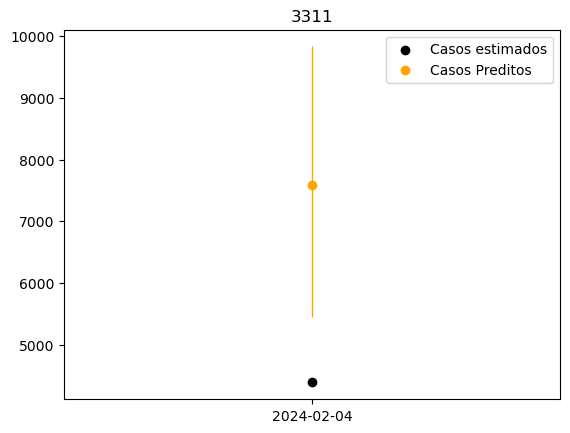

'acima'

In [31]:
date = '2024-02-04'
macro = 3311

plot_comp(date, macro, 'casos')
comp_preds(date, macro, 'casos')

In [32]:
import geopandas as gpd
import matplotlib.patches as mpatches

In [33]:
df_geo = gpd.read_file('shapefile_macro.gpkg')
df_geo.code_macro = df_geo.code_macro.astype(int)
df_geo

,code_macro,name_code_macro,name_macro,geometry
0,1101,Cacoal - 1101,Cacoal,"POLYGON ((-62.11971 -13.15353, -62.12429 -13.1..."
1,1102,Porto Velho - 1102,Porto Velho,"POLYGON ((-62.98157 -11.62905, -62.97462 -11.6..."
2,1201,Acre - 1201,Acre,"POLYGON ((-69.42562 -10.92824, -69.42598 -10.9..."
3,1302,Oeste - 1302,Oeste,"POLYGON ((-69.48189 -7.21666, -69.47903 -7.223..."
4,1304,Central - 1304,Central,"POLYGON ((-69.80135 -8.04128, -69.79179 -8.018..."
...,...,...,...,...
1112,5206,Sudoeste - 5206,Sudoeste,"POLYGON ((-51.11841 -19.30298, -51.12608 -19.3..."
1113,5207,Nordeste - 5207,Nordeste,"POLYGON ((-47.31576 -16.06733, -47.31156 -16.0..."
1114,5207,Nordeste - 5207,Nordeste,"POLYGON ((-46.85488 -15.61830, -46.85445 -15.6..."
1115,5210,Centro Sudeste - 5210,Centro Sudeste,"POLYGON ((-50.26556 -18.39373, -50.27463 -18.3..."


In [34]:
def get_geo_comp(df_geo, column):
    
    df_geo['model'] = np.nan

    for macro in df_geo.code_macro.unique():

        df_geo.loc[df_geo.code_macro == macro, 'model'] = comp_preds(date, macro, column)


    return df_geo

def get_geo_comp_perc(df_geo, column):
    
    df_geo['p_dif'] = np.nan

    for macro in df_geo.code_macro.unique():

        df_geo.loc[df_geo.code_macro == macro, 'p_dif'] = comp_perc_preds(date, macro, column)


    return df_geo



In [35]:
def plot_disc_comp(df_geo, col = 'Nowcast'):
    
    fig, ax = plt.subplots()

    df_geo.loc[df_geo.model == 'abaixo'].plot(ax=ax, color = 'tab:orange')

    df_geo.loc[df_geo.model == 'acima'].plot(ax=ax, color = 'tab:blue')

    df_geo.loc[df_geo.model == 'no intervalo'].plot(ax=ax, color = 'tab:green')

    ax.set_title(f'Comparação entre forecast \n e {col} na semana {date}')

    patchList = []
    patchList.append(mpatches.Patch(color='tab:orange', label=f'Forecast < {col}'))
    patchList.append(mpatches.Patch(color='tab:green', label=f'{col} no IC \n do Forecast'))
    patchList.append(mpatches.Patch(color='tab:blue', label=f'Forecast > {col}'))
    leg = ax.legend(handles=patchList, 
                       fontsize = 10, loc='upper right', bbox_to_anchor=(1.3, 1.02))

    ax.set_axis_off()
    
    plt.savefig(f'./plots/val_preds_{col}.png', dpi=300, bbox_inches='tight')


/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarni

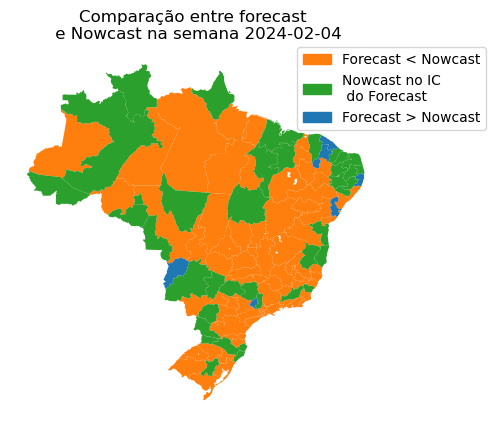

In [36]:
plot_disc_comp(get_geo_comp(df_geo, 'casos_est'), 'Nowcast')

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarni

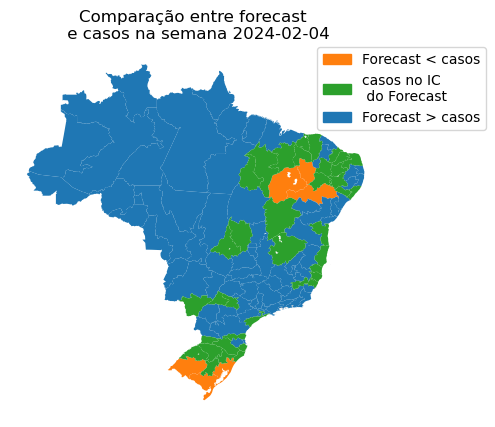

In [37]:
plot_disc_comp(get_geo_comp(df_geo, 'casos'), 'casos')

In [50]:
df_geo_ = get_geo_comp_perc(df_geo, 'casos_est')
df_geo_ = df_geo_.fillna(0)
df_geo_.replace([np.inf, -np.inf], 0, inplace=True)
df_geo_.head()

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_14008/3338691713.py:13: RuntimeWarning: invalid value encountered in double_scalars
  return 100*(for_median-casos_est)/casos_est


,code_macro,name_code_macro,name_macro,geometry,model,p_dif
0,1101,Cacoal - 1101,Cacoal,"POLYGON ((-62.11971 -13.15353, -62.12429 -13.1...",no intervalo,-58.953894
1,1102,Porto Velho - 1102,Porto Velho,"POLYGON ((-62.98157 -11.62905, -62.97462 -11.6...",no intervalo,-35.908797
2,1201,Acre - 1201,Acre,"POLYGON ((-69.42562 -10.92824, -69.42598 -10.9...",acima,-23.037822
3,1302,Oeste - 1302,Oeste,"POLYGON ((-69.48189 -7.21666, -69.47903 -7.223...",abaixo,-65.466964
4,1304,Central - 1304,Central,"POLYGON ((-69.80135 -8.04128, -69.79179 -8.018...",acima,153.713500


In [51]:
df_geo_.p_dif.min()

-100.0

In [52]:
df_geo_.p_dif.max()

153.71350035105945

In [53]:
df_geo_.p_dif.describe()

count    1117.000000
mean      -40.286721
std        22.230245
min      -100.000000
25%       -50.058194
50%       -38.278185
75%       -27.203964
max       153.713500
Name: p_dif, dtype: float64

In [54]:
df_geo_.loc[df_geo_.p_dif == np.inf]

,code_macro,name_code_macro,name_macro,geometry,model,p_dif


In [55]:
df_geo_.loc[df_geo_.p_dif.isna() ==True]

,code_macro,name_code_macro,name_macro,geometry,model,p_dif


In [56]:
df_geo_.isnull().sum()

code_macro         0
name_code_macro    0
name_macro         0
geometry           0
model              0
p_dif              0
dtype: int64

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


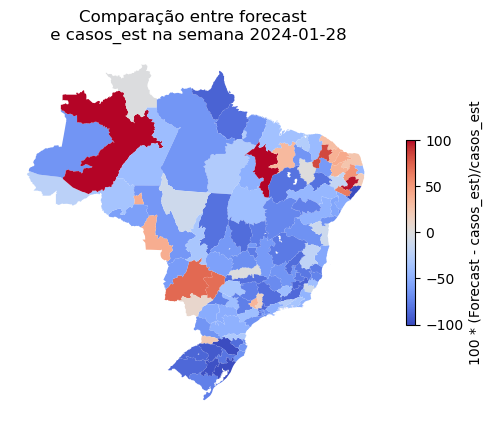

In [57]:
col = 'casos_est'
date = '2024-01-28'

fig, ax = plt.subplots()


df_geo_.plot(column = 'p_dif',legend = True, ax = ax, cmap = 'coolwarm', vmin= -100, vmax = 100, legend_kwds={
      'label': f"100 * (Forecast - {col})/{col}", 
        "shrink":.5
})

ax.set_title(f'Comparação entre forecast \n e {col} na semana {date}')

plt.savefig(f'./plots/val_perc_{col}.png', dpi=300, bbox_inches='tight')
    
ax.set_axis_off()